In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download nayeem04/breakhist-histopathological-breast-cancer

Dataset URL: https://www.kaggle.com/datasets/nayeem04/breakhist-histopathological-breast-cancer
License(s): apache-2.0
 98% 508M/520M [00:04<00:00, 154MB/s]
100% 520M/520M [00:04<00:00, 130MB/s]


In [10]:
!unzip /content/breakhist-histopathological-breast-cancer.zip

Archive:  /content/breakhist-histopathological-breast-cancer.zip
  inflating: Breast cancer/Breast Cancer Benign/SOB_B_A-14-22549AB-100-001.png  
  inflating: Breast cancer/Breast Cancer Benign/SOB_B_A-14-22549AB-100-002.png  
  inflating: Breast cancer/Breast Cancer Benign/SOB_B_A-14-22549AB-100-003.png  
  inflating: Breast cancer/Breast Cancer Benign/SOB_B_A-14-22549AB-100-004.png  
  inflating: Breast cancer/Breast Cancer Benign/SOB_B_A-14-22549AB-100-005.png  
  inflating: Breast cancer/Breast Cancer Benign/SOB_B_A-14-22549AB-100-006.png  
  inflating: Breast cancer/Breast Cancer Benign/SOB_B_A-14-22549AB-100-007.png  
  inflating: Breast cancer/Breast Cancer Benign/SOB_B_A-14-22549AB-100-008.png  
  inflating: Breast cancer/Breast Cancer Benign/SOB_B_A-14-22549AB-100-009.png  
  inflating: Breast cancer/Breast Cancer Benign/SOB_B_A-14-22549AB-100-010.png  
  inflating: Breast cancer/Breast Cancer Benign/SOB_B_A-14-22549AB-100-011.png  
  inflating: Breast cancer/Breast Cancer Ben

In [9]:
!pip install timm torch torchvision --quiet

!git clone https://github.com/facebookresearch/dinov3.git /content/dinov3

%cd /content/dinov3

!pip install -r requirements.txt --quiet

!mkdir -p checkpoints

# Download pretrained DINOv3 weights
!wget -c "https://dinov3.llamameta.net/dinov3_vitb16/dinov3_vitb16_pretrain_lvd1689m-73cec8be.pth?Policy=eyJTdGF0ZW1lbnQiOlt7InVuaXF1ZV9oYXNoIjoiOWRsMXI2ZWNpbDR2eTd2bm52dWFuNm1yIiwiUmVzb3VyY2UiOiJodHRwczpcL1wvZGlub3YzLmxsYW1hbWV0YS5uZXRcLyoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE3NjM0ODU3ODR9fX1dfQ__&Signature=p2D0zslKvQazMTrdkA%7Ef821rU8Y5dT54jgDhjK2bQRNkHkJLbhuTSpY8-2cSVgVh5UGKfErRUSo8WEIe7FC-Fa2ruy-gbtc3P7%7Ea1B0mMIt8ENoaC7RcAW5T4i0%7EIYivzi5HV-e7Ij0TvkaeN0VO10o-9mYW585txzwxf1Sb3TEflaSIBRT0omEOoL1qNR%7EJQm-eHXSqmLHPQndYp0RmVHNzbQ60UmFFHmi6bSo-V3Clxqmw5-lJdCvawA-ZIVbr1%7ErQJb3TcFpQ21dm7rIAl7LMbQbSB85YQg4W1eHnl-B0Hdn50h7P0SIW7wzjqYkXSiXwcm2zFpGKKiAvzBSfgA__&Key-Pair-Id=K15QRJLYKIFSLZ&Download-Request-ID=4290089187888057" \
     -O checkpoints/dinov3_vitb16_pretrain_lvd1689m-73cec8be.pth


import torch

REPO_DIR = "/content/dinov3"
WEIGHTS = "checkpoints/dinov3_vitb16_pretrain_lvd1689m-73cec8be.pth"

model = torch.hub.load(
    REPO_DIR,
    'dinov3_vitb16',
    source='local',
    weights=WEIGHTS,
)

# Freeze parameters
model.eval()
for p in model.parameters():
    p.requires_grad = False

print("Loaded DINOv3 ViT-B/16 successfully!")


Cloning into '/content/dinov3'...
remote: Enumerating objects: 516, done.
remote: Counting objects: 100% (278/278), done.
remote: Compressing objects: 100% (190/190), done.
remote: Total 516 (delta 170), reused 88 (delta 88), pack-reused 238 (from 2)
Receiving objects: 100% (516/516), 9.89 MiB | 25.56 MiB/s, done.
Resolving deltas: 100% (204/204), done.
/content/dinov3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 18.2 MB/s eta 0:00:00
--2025-11-17 06:40:55--  https://dinov3.llamameta.net/dinov3_vitb16/dinov3_vitb16_pretrain_lvd1689m-73cec8be.pth?Policy=eyJTdGF0ZW1lbnQiOlt7InVuaXF1ZV9oYXNoIjoiOWRsMXI2ZWNpbDR2eTd2bm52dWFuNm1yIiwiUmVzb3VyY2UiOiJodHRwczpcL1wvZGlub3YzLmxsYW1hbWV0YS5uZXRcLyoiLCJDb25kaXRpb24iOnsiRGF0ZUxlc3NUaGFuIjp7IkFXUzpFcG9jaFRpbWUiOjE3NjM0ODU3ODR9fX1dfQ__&Signature=p2D0zslKvQazMTrdkA%7Ef821rU8Y5dT54jgDhjK

100%|██████████| 327M/327M [00:01<00:00, 212MB/s]


Loaded DINOv3 ViT-B/16 successfully!


In [11]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import torch.nn as nn
import torch.optim as optim

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split

preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

data_root = '/content/dinov3/Breast cancer'

dataset = datasets.ImageFolder(root=data_root, transform=preprocess)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print("Dataset loaded successfully!")
print(f"Total images: {len(dataset)}")
print(f"Training images: {len(train_dataset)}")
print(f"Testing images: {len(test_dataset)}")
print(f"Classes: {dataset.classes}")

Dataset loaded successfully!
Total images: 4800
Training images: 3840
Testing images: 960
Classes: ['Breast Cancer Benign', 'Breast Cancer Malignant']


In [19]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

DinoVisionTransformer(
  (patch_embed): PatchEmbed(
    (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
    (norm): Identity()
  )
  (rope_embed): RopePositionEmbedding()
  (blocks): ModuleList(
    (0-11): 12 x SelfAttentionBlock(
      (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (attn): SelfAttention(
        (qkv): LinearKMaskedBias(in_features=768, out_features=2304, bias=True)
        (attn_drop): Dropout(p=0.0, inplace=False)
        (proj): Linear(in_features=768, out_features=768, bias=True)
        (proj_drop): Dropout(p=0.0, inplace=False)
      )
      (ls1): LayerScale()
      (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (mlp): Mlp(
        (fc1): Linear(in_features=768, out_features=3072, bias=True)
        (act): GELU(approximate='none')
        (fc2): Linear(in_features=3072, out_features=768, bias=True)
        (drop): Dropout(p=0.0, inplace=False)
      )
      (ls2): LayerScale()
    )
  )
  (norm): LayerN

In [20]:
from tqdm import tqdm

def extract_features(data_loader):
    all_feats, all_labels = [], []
    with torch.no_grad():
        for imgs, labels in tqdm(data_loader, desc="Extracting features"):
            imgs = imgs.to(device)
            feats = model(imgs)
            all_feats.append(feats)
            all_labels.append(labels)
    all_feats = torch.cat(all_feats)
    all_labels = torch.cat(all_labels)
    return all_feats, all_labels


In [21]:
train_features, train_labels = extract_features(train_loader)
test_features, test_labels = extract_features(test_loader)

Extracting features: 100%|██████████| 15/15 [00:14<00:00,  1.03it/s]


In [29]:
# Step 5: Linear classifier and training loop

feature_dim = train_features.shape[1]
num_classes = len(dataset.classes)
linear_head = nn.Linear(feature_dim, num_classes).to(device)
criterion = nn.CrossEntropyLoss()

optimizer = optim.AdamW(linear_head.parameters(), lr=2e-3, weight_decay=5e-4)

train_features = train_features.to(device)
test_features = test_features.to(device)
train_labels = train_labels.to(device)
test_labels = test_labels.to(device)

num_epochs = 100
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    linear_head.train()
    optimizer.zero_grad()
    outputs = linear_head(train_features)
    loss = criterion(outputs, train_labels)
    loss.backward()
    optimizer.step()

    # Store loss
    train_losses.append(loss.item())

    # Compute training accuracy
    preds = outputs.argmax(dim=1)
    acc = (preds == train_labels).float().mean().item()
    train_accuracies.append(acc)

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}, Accuracy: {acc*100:.2f}%")

# Evaluation
linear_head.eval()
with torch.no_grad():
    outputs = linear_head(test_features)
    preds = outputs.argmax(dim=1)
    accuracy = (preds == test_labels).float().mean().item()
    print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/100, Loss: 0.6777, Accuracy: 57.53%
Epoch 2/100, Loss: 0.6163, Accuracy: 74.06%
Epoch 3/100, Loss: 0.5638, Accuracy: 80.23%
Epoch 4/100, Loss: 0.5193, Accuracy: 83.41%
Epoch 5/100, Loss: 0.4817, Accuracy: 84.38%
Epoch 6/100, Loss: 0.4497, Accuracy: 85.31%
Epoch 7/100, Loss: 0.4224, Accuracy: 85.68%
Epoch 8/100, Loss: 0.3990, Accuracy: 86.28%
Epoch 9/100, Loss: 0.3787, Accuracy: 86.85%
Epoch 10/100, Loss: 0.3610, Accuracy: 87.53%
Epoch 11/100, Loss: 0.3456, Accuracy: 87.92%
Epoch 12/100, Loss: 0.3321, Accuracy: 88.15%
Epoch 13/100, Loss: 0.3202, Accuracy: 88.62%
Epoch 14/100, Loss: 0.3097, Accuracy: 89.01%
Epoch 15/100, Loss: 0.3003, Accuracy: 89.27%
Epoch 16/100, Loss: 0.2921, Accuracy: 89.66%
Epoch 17/100, Loss: 0.2846, Accuracy: 89.82%
Epoch 18/100, Loss: 0.2779, Accuracy: 89.87%
Epoch 19/100, Loss: 0.2719, Accuracy: 89.97%
Epoch 20/100, Loss: 0.2664, Accuracy: 90.18%
Epoch 21/100, Loss: 0.2613, Accuracy: 90.44%
Epoch 22/100, Loss: 0.2567, Accuracy: 90.57%
Epoch 23/100, Loss:

In [30]:
with torch.no_grad():
    train_preds = linear_head(train_features).argmax(dim=1)
    train_acc = (train_preds == train_labels).float().mean().item()
    print(f"Train Accuracy: {train_acc * 100:.2f}%")


Train Accuracy: 94.58%


In [33]:
import torch.nn.functional as F
from sklearn.metrics import confusion_matrix, classification_report

linear_head.eval()
with torch.no_grad():
    outputs = linear_head(test_features)

    preds = outputs.argmax(dim=1)
    y_score = F.softmax(outputs, dim=1)[:, 1].cpu().numpy()

    y_pred = preds.cpu().numpy()
    y_true = test_labels.cpu().numpy()


In [34]:
import numpy as np
from sklearn.metrics import (
    confusion_matrix, accuracy_score, recall_score, precision_score,
    f1_score, roc_auc_score, average_precision_score
)
from math import sqrt
from scipy.stats import norm

# --- Core Metrics ---
acc = accuracy_score(y_true, y_pred)
sens = recall_score(y_true, y_pred)  # sensitivity (recall of positive class)

# Specificity = TN / (TN + FP)
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
spec = tn / (tn + fp)

prec = precision_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auc = roc_auc_score(y_true, y_score)
pr_auc = average_precision_score(y_true, y_score)

cm = np.array([[tn, fp],
               [fn, tp]])

# --- 95% Confidence Intervals ---
def proportion_ci(p, n, alpha=0.05):
    z = norm.ppf(1 - alpha/2)
    se = sqrt(p * (1 - p) / n)
    return p - z * se, p + z * se

acc_ci = proportion_ci(acc, len(y_true))
sens_ci = proportion_ci(sens, tp + fn)
spec_ci = proportion_ci(spec, tn + fp)

# --- Print Results ---
print("\n--- Confusion Matrix ---")
print("        Pred 0   Pred 1")
print(f"True 0   {tn:6d}   {fp:6d}")
print(f"True 1   {fn:6d}   {tp:6d}")

print("\n--- Classification Metrics ---")
print(f"Accuracy:       {acc:.4f}   95% CI: {acc_ci[0]:.4f} to {acc_ci[1]:.4f}")
print(f"Sensitivity:    {sens:.4f}   95% CI: {sens_ci[0]:.4f} to {sens_ci[1]:.4f}")
print(f"Specificity:    {spec:.4f}   95% CI: {spec_ci[0]:.4f} to {spec_ci[1]:.4f}")
print(f"Precision:      {prec:.4f}")
print(f"F1 Score:       {f1:.4f}")
print(f"AUC-ROC:        {auc:.4f}")
print(f"PR-AUC:         {pr_auc:.4f}")



--- Confusion Matrix ---
        Pred 0   Pred 1
True 0      445       21
True 1       32      462

--- Classification Metrics ---
Accuracy:       0.9448   95% CI: 0.9303 to 0.9592
Sensitivity:    0.9352   95% CI: 0.9135 to 0.9569
Specificity:    0.9549   95% CI: 0.9361 to 0.9738
Precision:      0.9565
F1 Score:       0.9458
AUC-ROC:        0.9871
PR-AUC:         0.9886


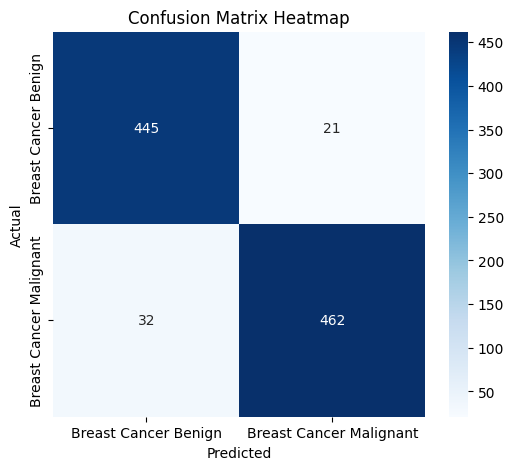

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=dataset.classes,
            yticklabels=dataset.classes)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [36]:
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=dataset.classes))


Classification Report:
                         precision    recall  f1-score   support

   Breast Cancer Benign       0.93      0.95      0.94       466
Breast Cancer Malignant       0.96      0.94      0.95       494

               accuracy                           0.94       960
              macro avg       0.94      0.95      0.94       960
           weighted avg       0.95      0.94      0.94       960



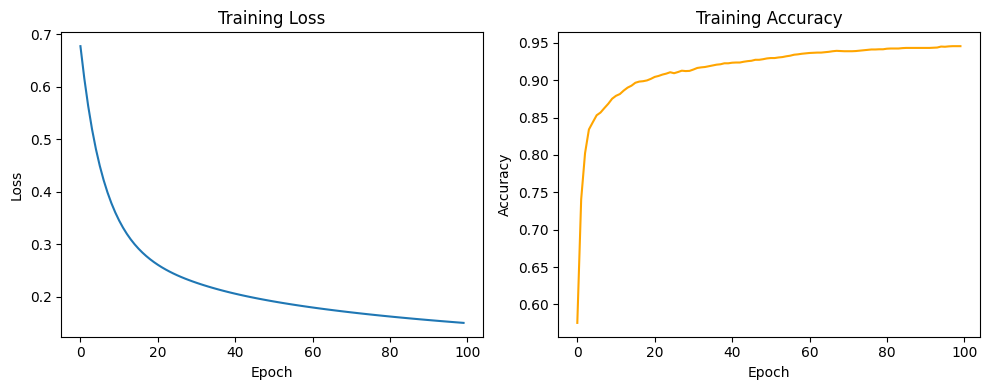

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1,2,2)
plt.plot(train_accuracies, label='Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()


In [38]:
import torch.nn.functional as F

linear_head.eval()
with torch.no_grad():
    outputs = linear_head(test_features)

    # predicted labels (as before)
    preds = outputs.argmax(dim=1)

    # y_score = probability of class 1 (positive class)
    # If binary classification:
    y_score = F.softmax(outputs, dim=1)[:, 1].cpu().numpy()

    # Convert predictions and labels for sklearn
    y_pred = preds.cpu().numpy()
    y_true = test_labels.cpu().numpy()
